In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset with the 'latin1' encoding

df = pd.read_csv("D:\laptop.csv")

In [3]:
df.shape

(1303, 13)

In [4]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [7]:
df.duplicated().sum()

0

In [8]:
# Drop unnecessary columns from dataset
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [9]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [10]:
df.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [11]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [12]:
# Remove missing rows
df.dropna(inplace=True)

In [13]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [14]:
df['Memory'].mode()

0    256GB SSD
Name: Memory, dtype: object

In [15]:
df['Memory']= df['Memory'].replace('?', '256GB SSD')

In [16]:
df['Memory'].str.split().str.get(0)

0       128GB
1       128GB
2       256GB
3       512GB
4       256GB
        ...  
1298    128GB
1299    512GB
1300     64GB
1301      1TB
1302    500GB
Name: Memory, Length: 1273, dtype: object

In [17]:
(df['Memory'].str.split().str.get(0)).value_counts()

Memory
256GB    496
1TB      233
128GB    173
512GB    138
500GB    130
32GB      44
64GB      16
2TB       16
1.0TB     10
16GB      10
180GB      4
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [18]:
df['Memory_Size']=df['Memory'].str.split().str.get(0)

In [19]:
df['Memory_Size'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '64GB', '32GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [20]:
df['Memory'].str.split().str.get(1)

0         SSD
1       Flash
2         SSD
3         SSD
4         SSD
        ...  
1298      SSD
1299      SSD
1300    Flash
1301      HDD
1302      HDD
Name: Memory, Length: 1273, dtype: object

In [21]:
df['Memory_Type']=df['Memory'].str.split().str.get(1)

In [22]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB,Flash


In [23]:
j=[]
for i in df['Memory_Size']:
    if 'GB' in i:
        j.append(int(i.replace('GB','')))
    else:
        j.append(float(i.replace('TB',''))*float(1000))
df['Memory_Size'] = j
df['Memory_Size']= df['Memory_Size'].astype('int')

In [24]:
df['Memory_Size']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: Memory_Size, Length: 1273, dtype: int32

In [25]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,Flash


In [26]:
df['Ram'].str.replace('GB','')

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1273, dtype: object

In [27]:
df['Ram']= df['Ram'].str.replace('GB','')
df['Ram']= df['Ram'].astype('int32')

In [28]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,Flash


<Axes: xlabel='Ram'>

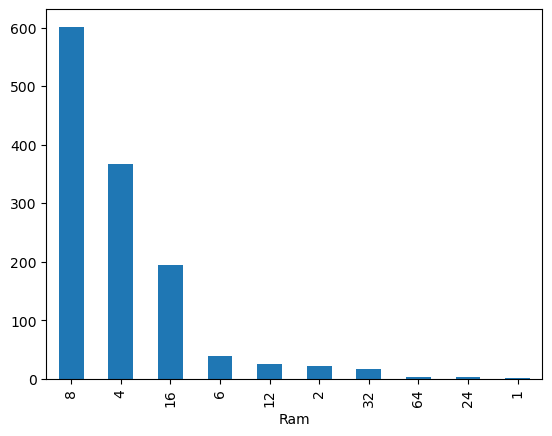

In [29]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

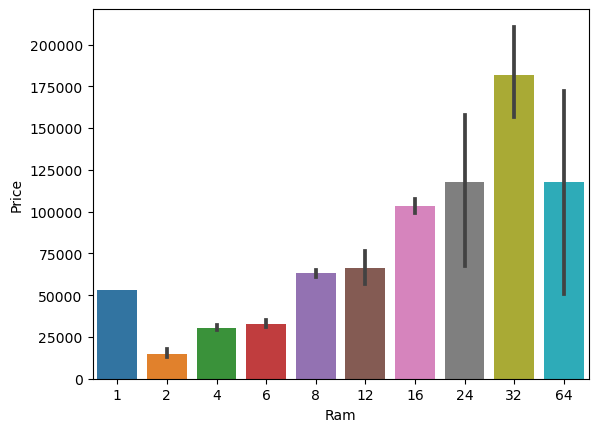

In [30]:
sns.barplot(x=df['Ram'], y=df['Price'])

In [31]:
df['Inches'].value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  Memory_Size       1273 non-null   int32  
 12  Memory_Type       1273 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 129.3+ KB


In [33]:
df['Inches'].mode()

0    15.6
Name: Inches, dtype: object

In [34]:
df['Inches'] = df['Inches'].replace('?', 15.6)

In [35]:
df['Inches'] = df['Inches'].astype('float64')

In [36]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,Flash


C:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


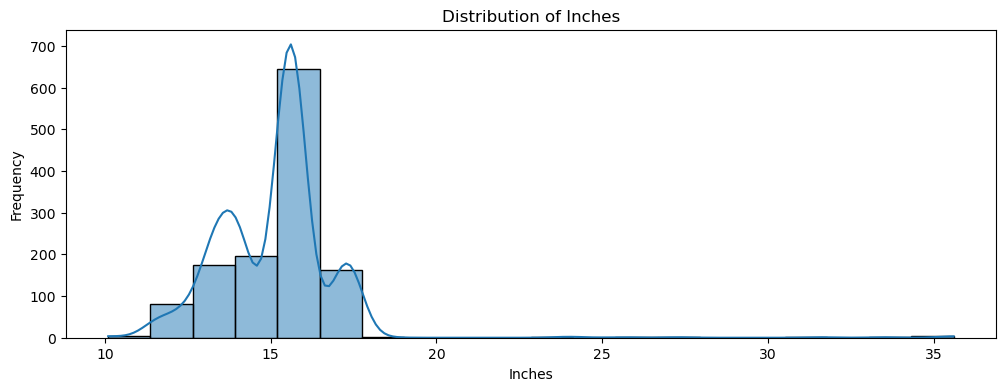

In [37]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='Inches', bins=20, kde=True)
plt.title('Distribution of Inches')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.show()

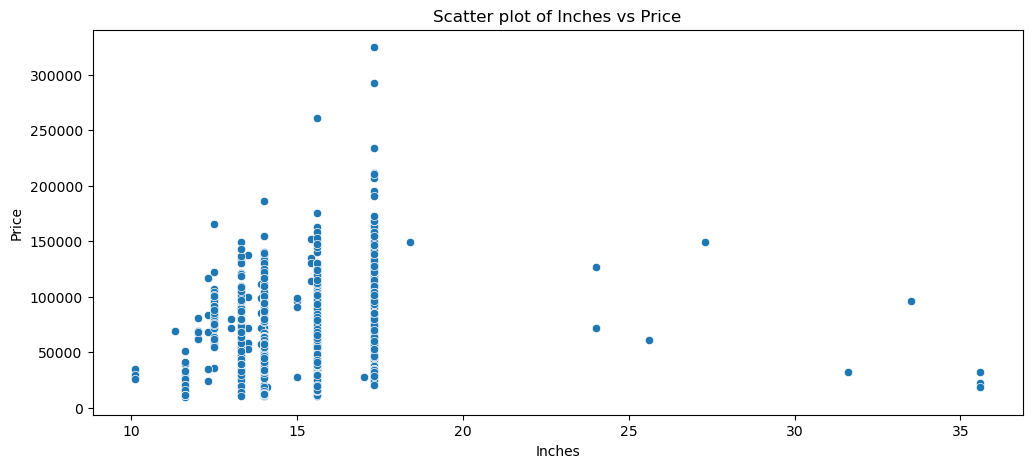

In [38]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Inches', y='Price')
plt.title('Scatter plot of Inches vs Price')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.show()

In [39]:
df.drop(columns=['Memory'], inplace=True)

In [40]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128,Flash


In [41]:
df['Weight'].value_counts()

Weight
2.2kg     111
2.1kg      57
2.4kg      43
2.3kg      41
2.5kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: count, Length: 189, dtype: int64

In [42]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [43]:
df['Weight'].mode()

0    2.2kg
Name: Weight, dtype: object

In [44]:
df['Weight']= df['Weight'].str.replace('kg','')

In [45]:
# Replace '?' with NaN in the 'Weight' column
df['Weight'] = df['Weight'].replace('?', np.nan)

In [46]:
# Replace NaN values MODE value, e.g., 0
df['Weight'].fillna(2.2, inplace=True)

In [47]:
# Convert the 'Weight' column to float64
df['Weight'] = df['Weight'].astype('float64')

C:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


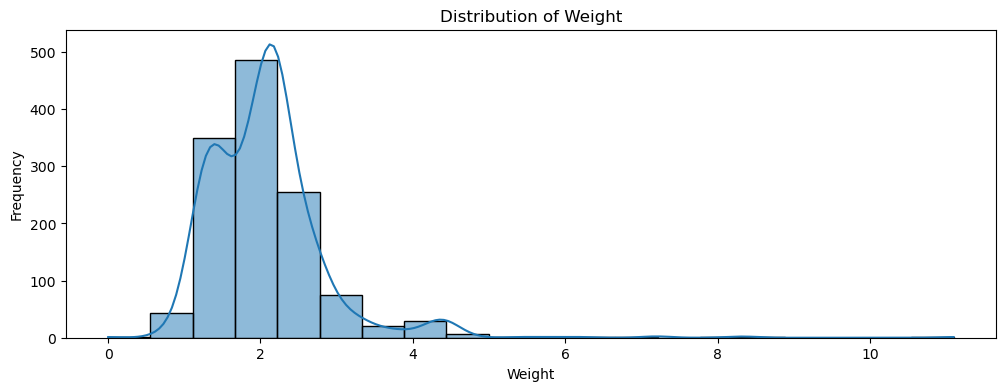

In [48]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='Weight', bins=20, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

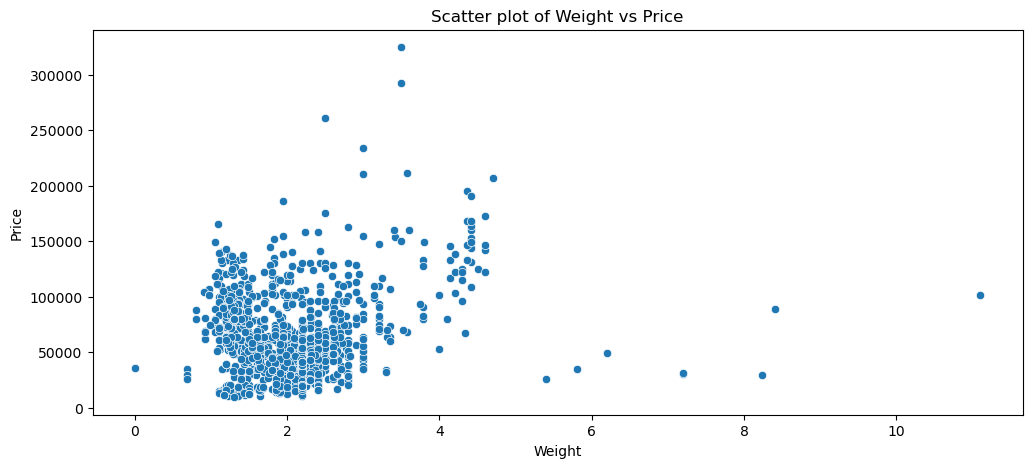

In [49]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='Weight', y='Price')
plt.title('Scatter plot of Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

In [50]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [51]:
df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1273, dtype: int64

In [52]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [53]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,32,Flash,1
195,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Nvidia GeForce 930MX,Windows 10,2.50,48697.92,1000,HDD,0
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.72,256,SSD,0
1153,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.72,1000,HDD,0


<Axes: xlabel='Touchscreen'>

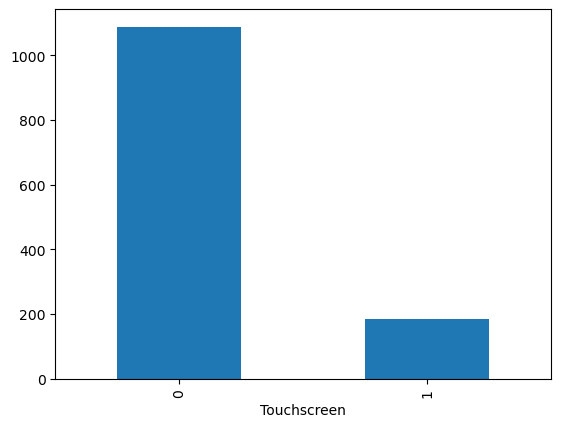

In [54]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

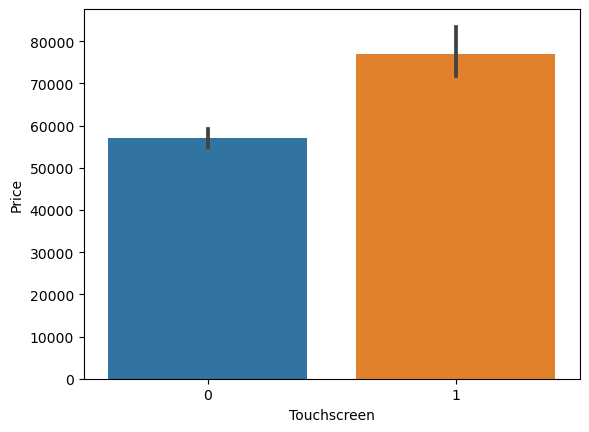

In [55]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [56]:
df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1273, dtype: int64

In [57]:
df['IPS Panel']= df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [58]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0


<Axes: xlabel='IPS Panel'>

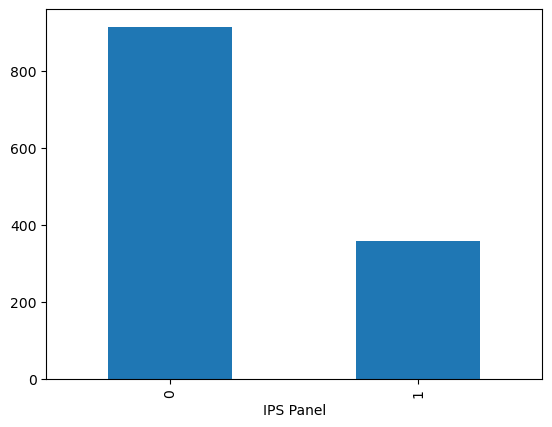

In [59]:
df['IPS Panel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS Panel', ylabel='Price'>

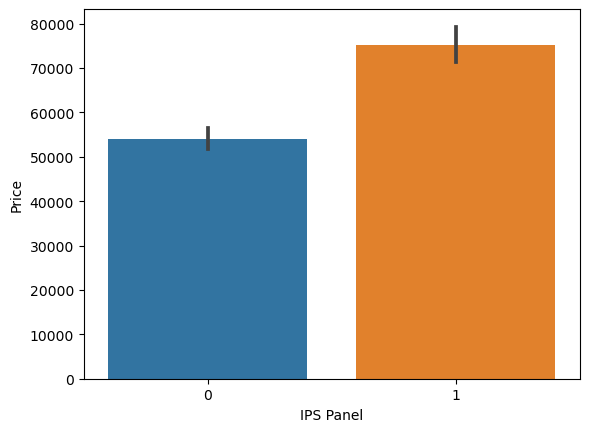

In [60]:
sns.barplot(x=df['IPS Panel'], y=df['Price'])

In [61]:
df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [62]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [63]:
df['Width']= new[0]
df['Length']= new[1]

In [64]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,Width,Length
126,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.63,43263.36,1000,HDD,0,0,Full HD 1920,1080
373,Lenovo,Notebook,17.3,1600x900,AMD A8-Series 7410 2.2GHz,4,AMD Radeon R5,Windows 10,2.60,26053.92,128,SSD,0,0,1600,900
471,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,AMD FirePro W4190M,Windows 10,1.90,61485.12,500,HDD,0,0,Full HD 1920,1080


In [65]:
(df['Width'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])).value_counts()

Width
1920    826
1366    301
3840     42
2560     28
3200     26
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: count, dtype: int64

In [66]:
df['Width']= df['Width'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [67]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,Width,Length
306,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,16,Intel HD Graphics 620,Windows 10,1.28,105228.00,256,SSD,1,0,1920,1080
1170,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,Intel HD Graphics 520,Windows 10,1.96,36177.12,256,SSD,0,0,1920,1080
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,40705.92,1000,HDD,0,0,1366,768


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Gpu               1273 non-null   object 
 7   OpSys             1273 non-null   object 
 8   Weight            1273 non-null   float64
 9   Price             1273 non-null   float64
 10  Memory_Size       1273 non-null   int32  
 11  Memory_Type       1273 non-null   object 
 12  Touchscreen       1273 non-null   int64  
 13  IPS Panel         1273 non-null   int64  
 14  Width             1273 non-null   object 
 15  Length            1273 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(9)
me

In [69]:
df['Width']= df['Width'].astype('int')
df['Length']= df['Length'].astype('int')

In [70]:
df['Touchscreen']= df['Touchscreen'].astype('int')

In [71]:
df['IPS Panel']= df['IPS Panel'].astype('int')

# CALCULATE `PPI`
# pixel density = (width**2 + lenght**2)**0.5 / screen size (Inches)

In [72]:
df['PPI']= (((df['Width']**2) + (df['Length']**2))**0.5/df['Inches']).astype('float64')

In [73]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,Width,Length,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,1920,1080,141.211998


In [74]:
df['ScreenResolution']=(df['Width']*df['Length']).astype('int32')

<Axes: xlabel='PPI', ylabel='Price'>

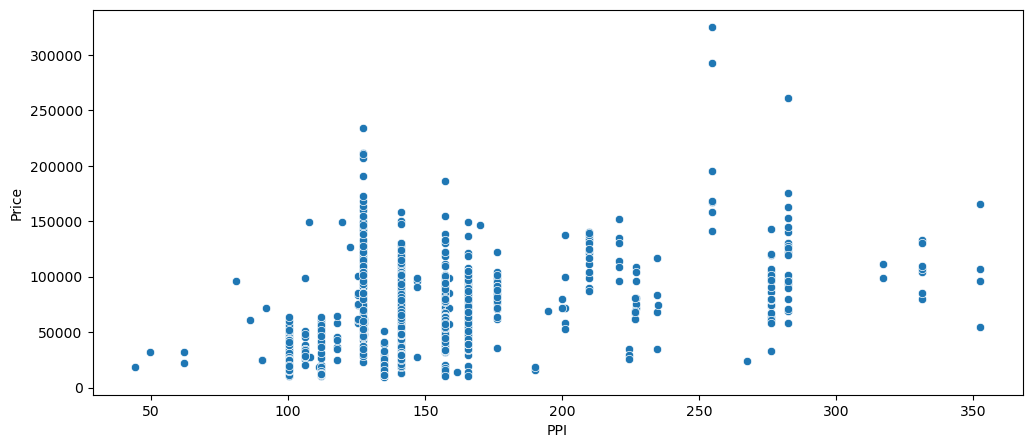

In [75]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='PPI', y='Price')

<Axes: xlabel='Inches', ylabel='Price'>

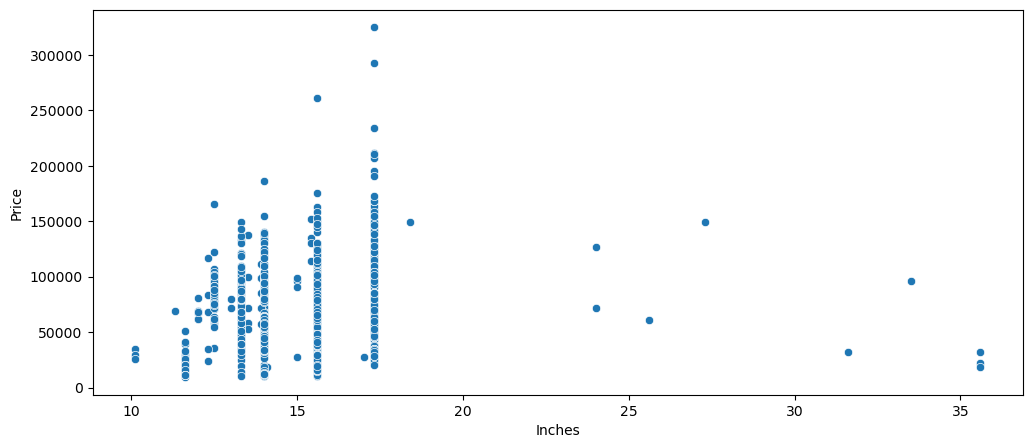

In [76]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Inches', y='Price')

In [77]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [78]:
df.head(3)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,Width,Length,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,1920,1080,141.211998


In [79]:
nc= df.select_dtypes(include=['float64', 'float32', 'int32'])

nc.corr()['Price']

Inches         0.044966
Ram            0.685648
Weight         0.175966
Price          1.000000
Memory_Size   -0.126021
Touchscreen    0.188994
IPS Panel      0.254851
Width          0.557556
Length         0.554069
PPI            0.468636
Name: Price, dtype: float64

In [80]:
df.drop(columns=['Width','Length'], inplace=True)

In [81]:
df.head(3)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,141.211998


In [82]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [83]:
(df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))).value_counts()

Cpu
Intel Core i7               515
Intel Core i5               410
Intel Core i3               134
Intel Celeron Dual           79
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
AMD A8-Series 7410            4
Intel Atom x5-Z8350           4
AMD Ryzen 1700                3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M           2
Intel Atom X5-Z8350           2
AMD A6-Series A6-9220         2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
AMD E-Series E2-9000e         2
AMD A10-Series 9600P          2
AMD Ryzen 1600                1
AMD E-Series E2-6110          1
Intel Atom x5-Z8300           1
AMD E-Series 9000e            1
AMD A6-Series 7310            1
Inte

In [84]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [85]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [86]:
print(fetch_processor('Intel Core i7')) 
print(fetch_processor('Intel Core i9')) 
print(fetch_processor('AMD Ryzen 5'))    

Intel Core i7
Other Intel Processor
AMD Processor


In [87]:
df['CPU Brand']= df['Cpu Name'].apply(fetch_processor)

In [88]:
df.head(3)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,Cpu Name,CPU Brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,141.211998,Intel Core i5,Intel Core i5


In [89]:
df.drop(columns=['Cpu','Cpu Name'], inplace= True)

In [90]:
df.head(3)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,141.211998,Intel Core i5


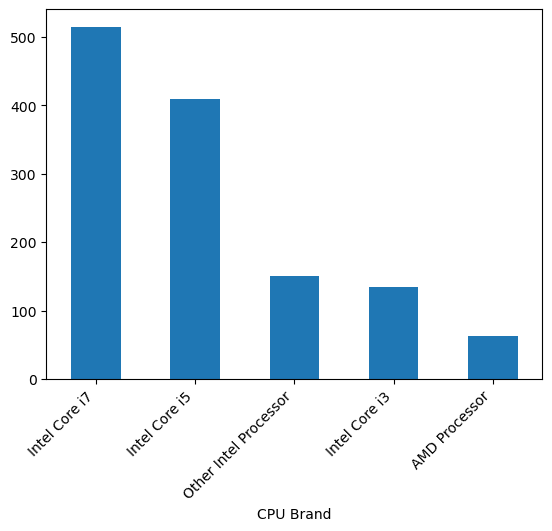

In [91]:
df['CPU Brand'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right') 
plt.show()

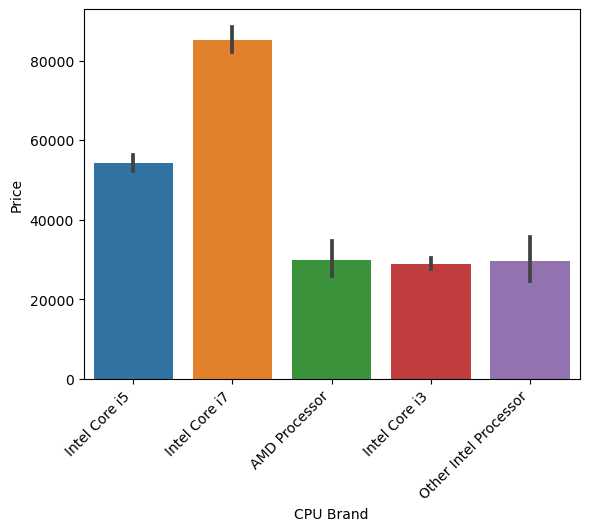

In [92]:
sns.barplot(x=df['CPU Brand'], y=df['Price'])
plt.xticks(rotation=45, ha='right') 
plt.show()

In [93]:
df.head(2)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5


In [94]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [95]:
(df['Gpu'].apply(lambda x:x.split()[0])).value_counts()

Gpu
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [96]:
df['Gpu Brand']= df['Gpu'].apply(lambda x:x.split()[0])

In [97]:
# remove ARN row 1191
df[df['Gpu Brand'] == 'ARM']

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand,Gpu Brand
1191,Samsung,2 in 1 Convertible,12.3,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,32,Flash,1,1,234.5074,AMD Processor,ARM


In [98]:
df= df[df['Gpu Brand'] != 'ARM']

In [99]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

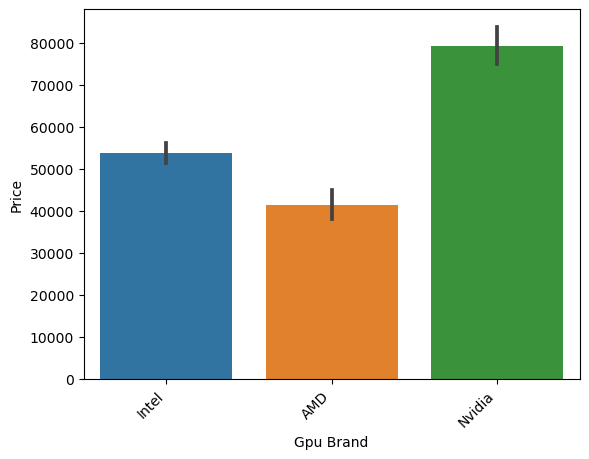

In [100]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation=45, ha='right') 
plt.show()

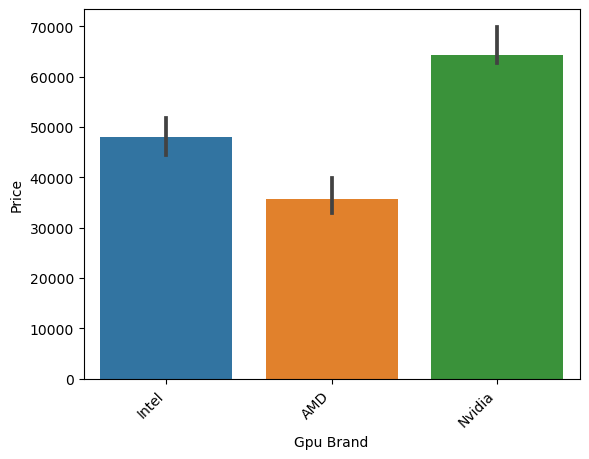

In [101]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'],estimator='median')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [102]:
df.head(3)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand,Gpu Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,0,0,141.211998,Intel Core i5,Intel


In [103]:
df.drop(columns=['Gpu'],inplace=True)

In [104]:
df.head(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand,Gpu Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,256,SSD,0,0,141.211998,Intel Core i5,Intel


In [105]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

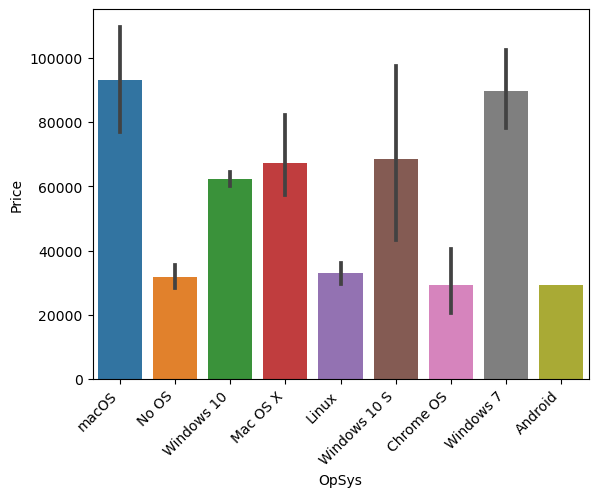

In [106]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=45, ha='right') 
plt.show()

In [107]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux' 

In [108]:
print(cat_os('Windows 10'))  
print(cat_os('Mac OS X'))     
print(cat_os('Ubuntu'))

Windows
Mac
Others/No OS/Linux


In [109]:
df['Osy']= df['OpSys'].apply(cat_os)

In [110]:
df.drop(columns=['OpSys'],inplace=True)

In [111]:
df.head(3)

,Company,TypeName,Inches,Ram,Weight,Price,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand,Gpu Brand,Osy
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,128,SSD,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,128,Flash,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,256,SSD,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux


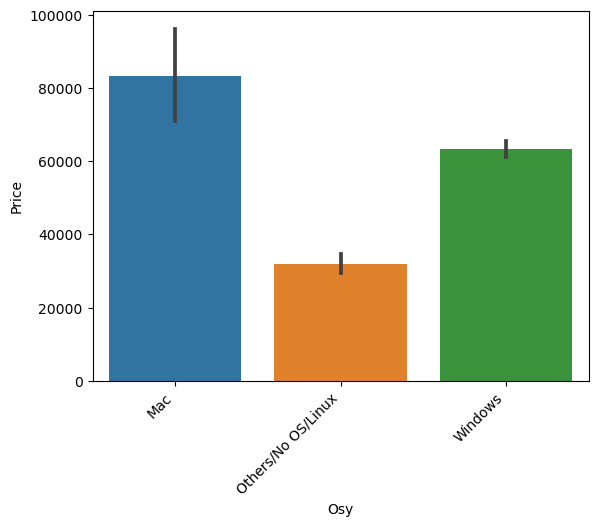

In [112]:
sns.barplot(x=df['Osy'], y=df['Price'])
plt.xticks(rotation=45, ha='right') 
plt.show()

In [113]:
nc= df.select_dtypes(include=['float64', 'float32', 'int32','int64'])

nc.corr()['Price']

Inches         0.044252
Ram            0.685521
Weight         0.175486
Price          1.000000
Memory_Size   -0.126713
Touchscreen    0.190738
IPS Panel      0.255987
PPI            0.470554
Name: Price, dtype: float64

In [114]:
nc.corr()

,Inches,Ram,Weight,Price,Memory_Size,Touchscreen,IPS Panel,PPI
Inches,1.000000,0.141355,0.493933,0.044252,0.184454,-0.236939,-0.098833,-0.392136
Ram,0.141355,1.000000,0.282782,0.685521,0.010659,0.096109,0.216237,0.291130
Weight,0.493933,0.282782,1.000000,0.175486,0.148105,-0.249688,0.003594,-0.275044
Price,0.044252,0.685521,0.175486,1.000000,-0.126713,0.190738,0.255987,0.470554
Memory_Size,0.184454,0.010659,0.148105,-0.126713,1.000000,-0.028548,-0.115074,-0.149607
Touchscreen,-0.236939,0.096109,-0.249688,0.190738,-0.028548,1.000000,0.150160,0.441476
IPS Panel,-0.098833,0.216237,0.003594,0.255987,-0.115074,0.150160,1.000000,0.304677
PPI,-0.392136,0.291130,-0.275044,0.470554,-0.149607,0.441476,0.304677,1.000000


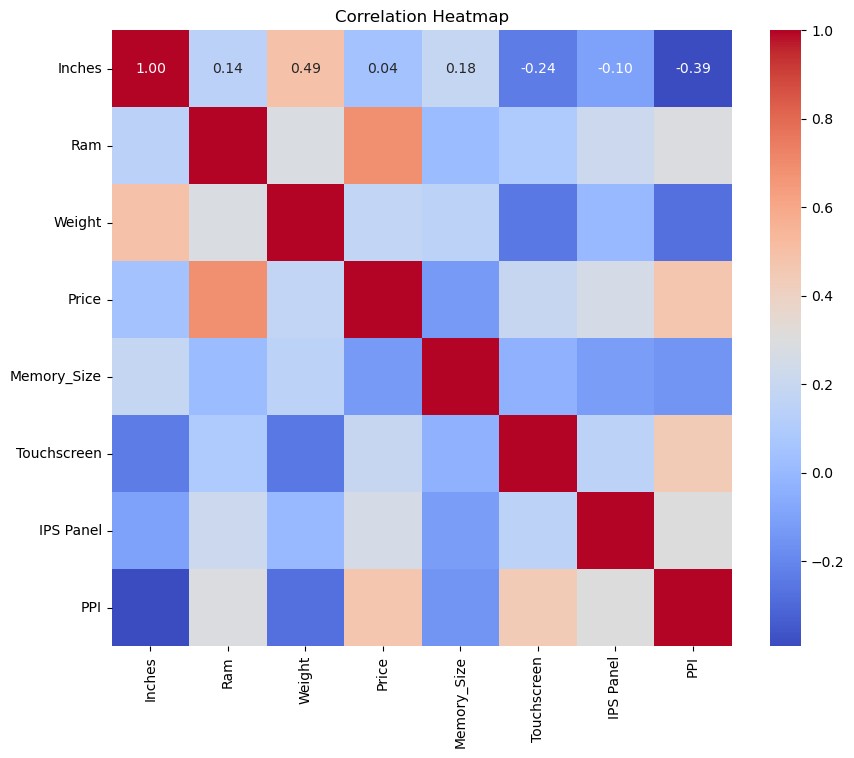

In [115]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nc.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


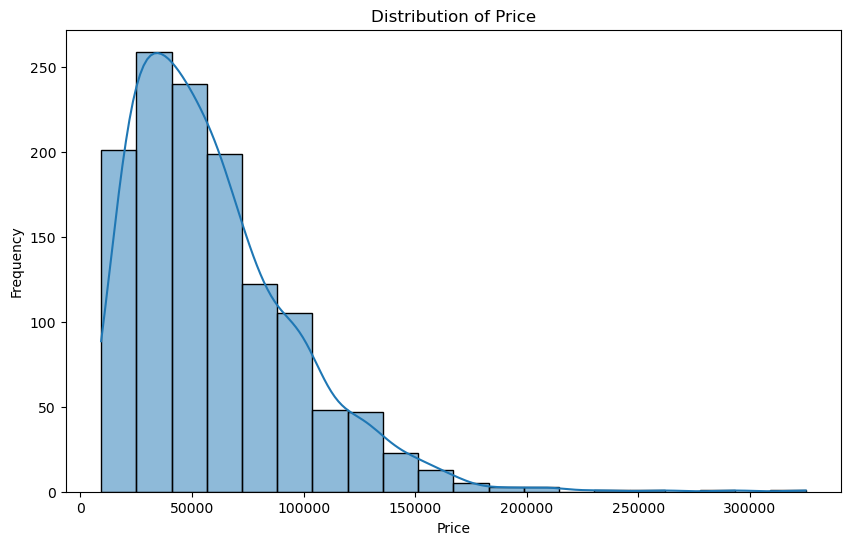

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


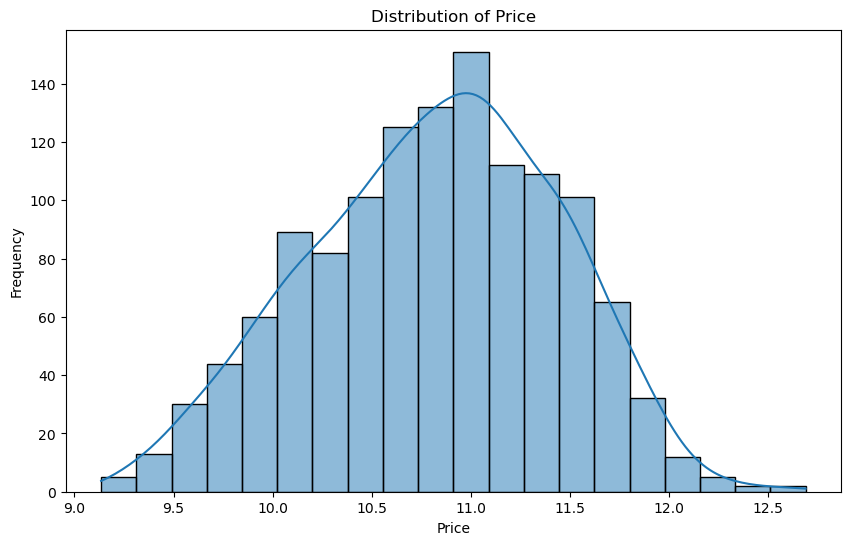

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['Price']), bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [118]:
df.describe()

,Inches,Ram,Weight,Price,Memory_Size,Touchscreen,IPS Panel,PPI
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,15.133412,8.466195,2.078444,59975.345751,443.248428,0.144654,0.281447,145.940163
std,1.952865,5.565188,0.807396,37340.426973,356.644068,0.351890,0.449882,43.381675
min,10.100000,1.000000,0.000200,9270.720000,8.000000,0.000000,0.000000,44.019462
25%,14.000000,4.000000,1.500000,31914.720000,256.000000,0.000000,0.000000,127.335675
50%,15.600000,8.000000,2.040000,52161.120000,256.000000,0.000000,0.000000,141.211998
75%,15.600000,8.000000,2.320000,79346.840400,512.000000,0.000000,1.000000,157.350512
max,35.600000,64.000000,11.100000,324954.720000,2000.000000,1.000000,1.000000,352.465147


<Axes: title={'center': 'Price'}>

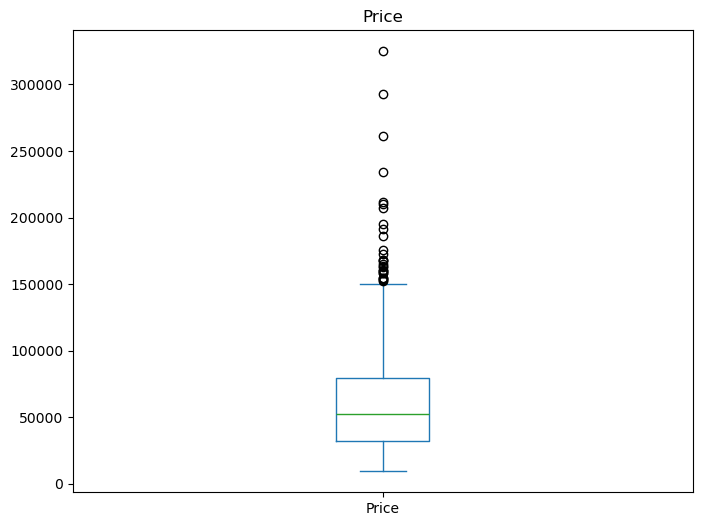

In [119]:
plt.figure(figsize=(8, 6))
df['Price'].plot(kind='box', title='Price')

# Data Transformation Encoding Categorical Variables

In [120]:
x= df.drop(columns=['Price'])
y= np.log(df['Price'])

In [121]:
x

,Company,TypeName,Inches,Ram,Weight,Memory_Size,Memory_Type,Touchscreen,IPS Panel,PPI,CPU Brand,Gpu Brand,Osy
0,Apple,Ultrabook,13.3,8,1.37,128,SSD,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,128,Flash,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,8,1.86,256,SSD,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,512,SSD,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,256,SSD,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,128,SSD,1,1,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,512,SSD,1,1,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,64,Flash,0,0,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,1000,HDD,0,0,100.454670,Intel Core i7,AMD,Windows


In [122]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [123]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Inches       1272 non-null   float64
 3   Ram          1272 non-null   int32  
 4   Weight       1272 non-null   float64
 5   Memory_Size  1272 non-null   int32  
 6   Memory_Type  1272 non-null   object 
 7   Touchscreen  1272 non-null   int32  
 8   IPS Panel    1272 non-null   int32  
 9   PPI          1272 non-null   float64
 10  CPU Brand    1272 non-null   object 
 11  Gpu Brand    1272 non-null   object 
 12  Osy          1272 non-null   object 
dtypes: float64(3), int32(4), object(6)
memory usage: 119.2+ KB


In [124]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x[['Company', 'TypeName', 'Memory_Type', 'CPU Brand', 'Gpu Brand', 'Osy']])

OneHotEncoder()

In [125]:
from sklearn.compose import make_column_transformer
column_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),[0, 1, 6, 10, 11, 12]),
                                      remainder='passthrough')

# MODEL TRAINING

In [126]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 1. LINEAR REGRESSION

In [145]:
lr= LinearRegression()

# Create a pipeline with column transformation and LinearRegression
pipe= make_pipeline(column_trans,lr)


# Fit the pipeline on the training data
pipe.fit(x_train,y_train)

# Make predictions on the testing data
y_pred= pipe.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("R-squared score:", r2)

print("Mean Absolute Error:", mae)

R-squared score: 0.8431396061276561
Mean Absolute Error: 0.20687181213209044


In [146]:
np.exp(0.20)

1.2214027581601699

In [147]:
score= []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    pipe= make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred= pipe.predict(x_test)
    r2_score(y_test,y_pred)
    score.append(r2_score(y_test,y_pred))

In [148]:
print(np.argmax(score))
print(score[np.argmax(score)])

815
0.8613197525225438


# 2. Gradient Boosting

In [149]:
gb= GradientBoostingRegressor()

pipe = make_pipeline(column_trans,gb)

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae= mean_absolute_error(y_test, y_pred)

print("R-squared score:", r2)

print("Gradient Boosting Mean Absolute Error:", mae)

R-squared score: 0.8803014466529894
Gradient Boosting Mean Absolute Error: 0.1651237874385067


In [150]:
np.exp(0.16)

1.1735108709918103

# 3. RANDOM FOREST

In [152]:
rf= RandomForestRegressor()

pipe = make_pipeline(column_trans,rf)

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae= mean_absolute_error(y_test, y_pred)

print("R-squared score:", r2)

print("Random Forest Mean Absolute Error:", mae)

R-squared score: 0.8812033332120922
Random Forest Mean Absolute Error: 0.15239117369812755


In [153]:
np.exp(0.15)

1.161834242728283

# HYperparameters Tune

In [154]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate performance on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score with best hyperparameters:", r2)

Best Hyperparameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
R-squared score with best hyperparameters: 0.8810605239020244


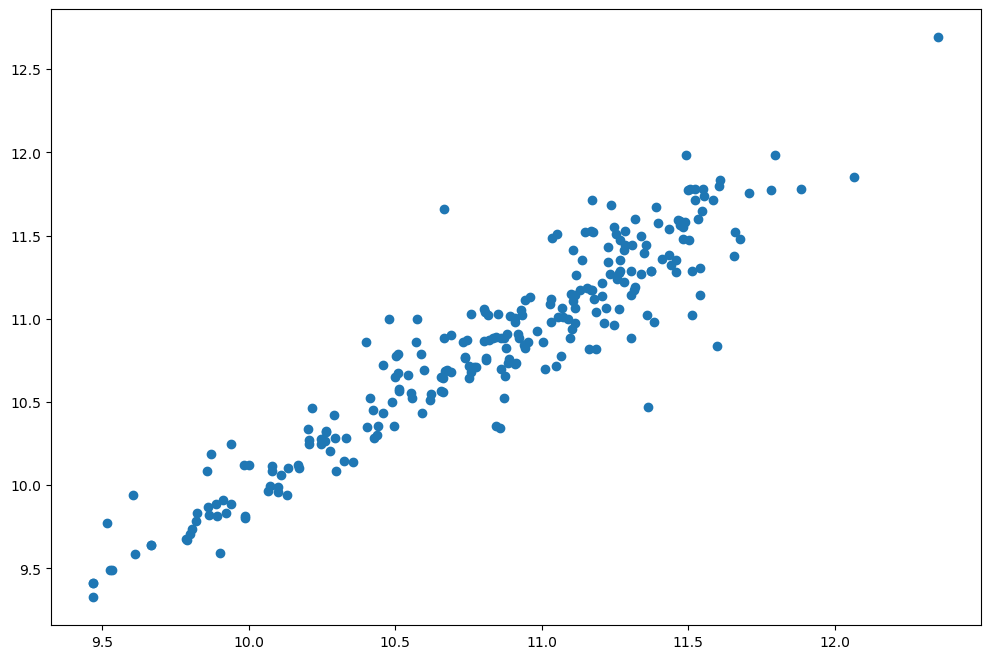

In [155]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test)
#plt.plot(range(9, 15), range(9, 15), c='red')

# EXPORTING THE MODEL

In [156]:
import pickle

# specific the file path on the D drive
file_fath1 = 'D:/df.pkl'
file_fath2 = 'D:/pipe.pkl'

# Save DataFrame 'df' to a pickle file
with open(file_fath1, 'wb') as file:
    pickle.dump(df, file)

# Save the trained model 'pipe' to a pickle file
with open(file_fath2, 'wb') as file:
    pickle.dump(pipe, file)


In [139]:
# import pickle
# pickle.dump(df,open('df.pkl','wb'))
# pickle.dump(pipe,open('pipe.pkl','wb'))

In [140]:
#x

In [141]:
# import pickle

# # Load the pickled model
# try:
#     with open('pipe.pkl', 'rb') as file:
#         pipe = pickle.load(file)
# except Exception as e:
#     print("Error loading pickled object:", e)

# # Use the loaded model for predictions
# # For example:
# # prediction = pipe.predict(input_data)


In [142]:
#x_train

In [143]:
#df['TypeName'].unique()

In [144]:
#column_trans